# Logistic Regression SKLEARN

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [2]:
data = pd.read_csv('CC2.csv')
data.head(3)

In [166]:
data.describe()

,default,student,balance,income
count,9501.000000,9501.000000,9501.000000,9501.000000
mean,0.035049,0.302915,879.249432,33316.251726
std,0.183913,0.459543,455.729715,13379.374162
min,0.000000,0.000000,0.023816,771.967729
25%,0.000000,0.000000,539.441909,21097.370307
50%,0.000000,0.000000,854.511279,34316.890148
75%,0.000000,1.000000,1185.096271,43660.391714
max,1.000000,1.000000,2654.322576,73554.233495


In [4]:
#int variables into categoric ones (binary)
data['default'] = data['default'].replace({'No':0,'Yes':1})
data['student'] = data['student'].replace({'No':0,'Yes':1})

#setting first column as index
data.set_index('Unnamed: 0', inplace=True)

In [5]:
#delegting Balance = 0 observations
data = data[data['balance']>0]

#### Exploratory analysis was made on the Multiple Regression analysis file

# Balancing dataset

In [32]:
#function recieves data and new size for most represented class
def balancing(data,size):
    
    mistura = data.sample(frac=1,random_state=4)
    #Default fica num dataset separado
    fraude = mistura.loc[mistura['default'] == 1]
    #Selecionna n observações aleatoriamente de default = No
    nao_fraude = mistura.loc[mistura['default'] == 0].sample(n=size,random_state=503)
    
    return pd.concat([fraude, nao_fraude])

In [33]:
df = balancing(data,100)
(df[df['default']==0].shape, df[df['default']==1].shape)

((100, 4), (333, 4))

In [34]:
#Correlation matrix
data[['default','student','income','balance']].corr()

,default,student,income,balance
default,1.000000,0.032543,-0.017480,0.363251
student,0.032543,1.000000,-0.757393,0.189819
income,-0.017480,-0.757393,1.000000,-0.140588
balance,0.363251,0.189819,-0.140588,1.000000


# Logistic Regression

### Split train and test data

In [184]:
#first split: dataset with all features 
xtrain,xtest,ytrain,ytest = train_test_split(df[['balance','student','income']],
                                             df['default'],test_size=.50,random_state=503)

#second split: dataset without 'income'
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(df[['balance']],
                                             df['default'],test_size=.50,random_state=503)


#### Because the dataset now only contains 433 observations, we will use 'liblinar' as the solver for our logistic regression

In [194]:
model1 = LogisticRegression(max_iter=2000).fit(xtrain, ytrain)
model2 = LogisticRegression(max_iter=2000).fit(xtrain2, ytrain2)

prediction = model1.predict(xtest)
prediction2 = model2.predict(xtest2)


### Confusion Matrix

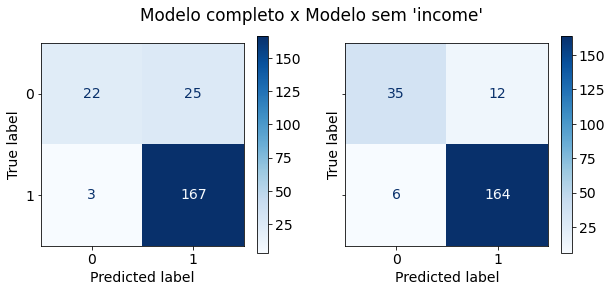

In [195]:
fig, ax = plt.subplots(1,2,figsize=(10,4),sharey=True)

plot_confusion_matrix(model1,xtest,ytest,cmap='Blues',ax=ax[0])

plot_confusion_matrix(model2,xtest2,ytest2,cmap='Blues',ax=ax[1])
fig.suptitle("Modelo completo x Modelo sem 'income'")
plt.show()

### ROC Curve

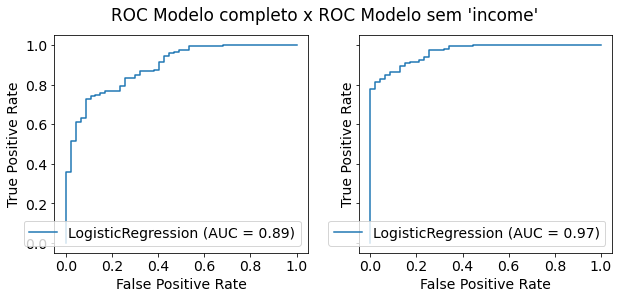

In [196]:
fig, ax = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True)

plot_roc_curve(model1,xtest,ytest,ax=ax[0])
plot_roc_curve(model2,xtest2,ytest,ax=ax[1])
fig.suptitle("ROC Modelo completo x ROC Modelo sem 'income'")

plt.show()

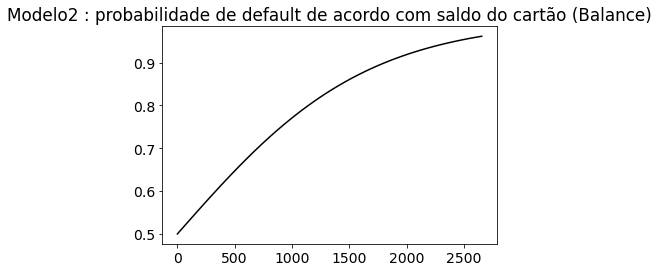

In [202]:
x = np.linspace(0,max(df['balance']))
prob2 = model2.predict_proba(x.reshape(-1,1)).T[1]

sns.lineplot(x= x, y = prob,color='black').set_title("Modelo2 : probabilidade de default de acordo com saldo do cartão (Balance)")
plt.show()